In [279]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from urllib.request import urlopen

In [2]:
pd.options.display.max_colwidth = 200

In [3]:
#download (image_predictions.tsv) programmatically using  Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image_predictions.tsv','wb') as f:
    f.write(r.content)

In [4]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df_images = pd.read_csv('image_predictions.tsv', sep= '\t')

In [18]:
# create an api object using tweepy
import tweepy

consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [20]:
# loop over list of tweet_id to query api for status and then extract
# favorite count and retweet count
# store in a json file 
tweets_list=[]
deleted_tweets_list=[]
IDS= list(df.tweet_id)
for ID in IDS:
    try:
        status = api.get_status(ID, tweet_mode="extended")
        likes_count = status._json['favorite_count']
        retweet_count = status._json['retweet_count']
        tweets_list.append({'tweet_id': ID,
                            'likes_count':int(likes_count),
                            'retweet_count':int(retweet_count)})
    except:
        deleted_tweets_list.append(ID)

        
data = {}
data['tweets'] = tweets_list

with open('twitter-counts.txt', 'w') as f:
    json.dump(data, f)



In [32]:
# create a dataframe from data collected using twitter api

keys= data['tweets'][0].keys()
df_counts= pd.DataFrame(tweets_list, columns= keys)
df_counts

,tweet_id,likes_count,retweet_count
0,892420643555336193,36713,7830
1,892177421306343426,31615,5798
2,891815181378084864,23820,3840
3,891689557279858688,40032,7998
4,891327558926688256,38228,8632
...,...,...,...
2328,666049248165822465,99,41
2329,666044226329800704,276,134
2330,666033412701032449,117,43
2331,666029285002620928,121,43


In [33]:
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id         2333 non-null int64
likes_count      2333 non-null int64
retweet_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
df.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wyatt. His throne is modeled after him. 13/10 Wyatt is a very big deal https://t.co/PccQ1CFEDd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761660297217/photo/1,13,10,Wyatt,None,None,None,None
280,839549326359670784,NaN,NaN,2017-03-08 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Winston. He knows he's a little too big for the swing, but he doesn't care. Kindly requests a push. 12/10 would happily oblige https://t.co/GuxEXTdnMu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/839549326359670784/photo/1,12,10,Winston,None,None,None,None
1686,681610798867845120,NaN,NaN,2015-12-28 23:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*collapses* 12/10 https://t.co/C7M8mnzHIK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681610798867845120/photo/1,12,10,None,None,None,None,None
656,791780927877898241,NaN,NaN,2016-10-27 23:17:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Maddie. She gets some wicked air time. Hardcore barkour. 11/10 nimble af https://t.co/bROYbceZ1u,7.467577e+17,4.196984e+09,2016-06-25 17:31:25 +0000,"https://vine.co/v/5BYq6hmrEI3,https://vine.co/v/5BYq6hmrEI3",11,10,Maddie,None,None,None,None
1365,702684942141153280,NaN,NaN,2016-02-25 02:42:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's sick of these bullshit generalizations 11/10 https://t.co/d2b5C2R0aO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702684942141153280/photo/1,11,10,Lucy,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,None,None,None,None
467,817120970343411712,NaN,NaN,2017-01-05 21:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817120970343411712/photo/1,13,10,None,None,None,None,None
944,752682090207055872,NaN,NaN,2016-07-12 01:52:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Nothing better than a doggo and a sunset. 10/10 majestic af https://t.co/xVSodF19PS,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/752682090207055872/photo/1,https://twitter.com/dog_rates/status/752682090207055872/photo/1",10,10,None,doggo,None,None,None
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782870896641/photo/1,11,10,None,None,None,None,None
746,780074436359819264,NaN,NaN,2016-09-25 16:00:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a doggo questioning his entire existence. 10/10 someone tell him he's a good boy https://t.co/dVm5Hgdpeb,NaN,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo,None,None,None


In [7]:
# check is an expanded_url, and it turns out to be the link to the photos or video in the tweet.

list(df[df.in_reply_to_status_id.notnull() & df.expanded_urls.notnull()].expanded_urls)[7]

'https://twitter.com/dog_rates/status/705786532653883392/photo/1'

In [8]:
df.loc[25, 'expanded_urls']

'https://twitter.com/dog_rates/status/887101392804085760/photo/1'

In [9]:
# check tweets that doesn't have images and are not replies or retweets.
# They are not dog rating tweets.

df[df.expanded_urls.isnull() & df.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [192]:
# check incorrect values in name columns, by collecting all entries with less than 3 characters.
df[ df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
mad              2
not              2
actually         2
getting          2
his              1
unacceptable     1
infuriating      1
officially       1
incredibly       1
my               1
old              1
life             1
light            1
space            1
all              1
by               1
such             1
this             1
Name: name, dtype: int64

In [12]:
# check denominator values other than 10
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
# most of which are group photos which doesn't qualify to our purpose
df[(~(df.rating_denominator == 10)) & (df.in_reply_to_status_id.isnull()) & (df.retweeted_status_user_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Je

In [14]:
df_images.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True
1059,714982300363173890,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,Brittany_spaniel,0.944376,True,beagle,0.025435,True,Ibizan_hound,0.009962,True
599,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,wallaby,0.164215,False,West_Highland_white_terrier,0.093515,True,ashcan,0.067278,False
1192,739979191639244800,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1,Irish_water_spaniel,0.285800,True,wig,0.240653,False,toy_poodle,0.074914,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
1752,824325613288833024,https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg,1,Pembroke,0.990793,True,Cardigan,0.008919,True,basenji,0.000262,True
918,701601587219795968,https://pbs.twimg.com/media/CbyW7B0W8AIX8kX.jpg,1,Chihuahua,0.993661,True,Pembroke,0.001505,True,toy_terrier,0.000867,True
1935,859924526012018688,https://pbs.twimg.com/media/C-8QypZXcAAekaF.jpg,1,French_bulldog,0.254587,True,Staffordshire_bullterrier,0.192558,True,hog,0.100270,False
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1625,803773340896923648,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True


In [15]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# check df and df_images conformity 

mergedStuff = pd.merge(df, df_images, on=['tweet_id'], how='inner')
mergedStuff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

In [17]:
# despite how funny those predictions are,those are not dogs
df_images[(df_images['p1_dog'] == False) & (df_images['p2_dog'] == False) & (df_images['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


# Assess
---

## Quality

`df`
- A number of entries are replies and retweets or doesn't contain images. 
- nulls represented as 'None' in [name, stages columns]
- some *name* values are incorrect (a,an,by,my,O)
- *denominator* values that are not 10
- Erroneous datatypes (tweet_id, timestamp, stage)

`df_images`
- missing records (281) compared to `df`
- records that doesn't have 'dog' predictions
- entries should have one 'dog' prediction with the highest 'conf' probability 

`df_counts`
- missing records (2333 instead of 2356) compared to `df`

## Tidiness

`df` 
- stages are split into 4 columns instead of 1.
- [in_reply_to_status_id,	in_reply_to_user_id,	source,	retweeted_status_id,	retweeted_status_user_id,	retweeted_status_timestamp] are redundant.
- `df_counts` to be merged with master `df`



# Clean

In [163]:
# make copies of all dataframes
df_clean = df.copy()
images_clean = df_images.copy()
counts_clean = df_counts.copy()

- `df_counts` to be merged with master `df`
- `df_counts`: missing records (2333 instead of 2356) compared to `df`


  *Merge the 'likes_count,retweet_count' columns to the `df` table, joining on 'tweet_id'*.

In [164]:
# we merge using an inner joint to solve the missing records of df_counts as well
df_clean = pd.merge(df_clean, counts_clean, on= 'tweet_id', how = 'inner')

In [165]:
# test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 19 columns):
tweet_id                      2333 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2333 non-null object
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          2333 non-null object
doggo                         2333 non-null object
floofer                       2333 non-null object
pupper                        2333 non-null object
puppo                         2333 non-null object
likes_count                   23

- `df`: A number of entries are replies and retweets or doesn't contain images. 

    *select a subset of df_clean that doesn't contain any retweets or replies, but must contain an image*


In [166]:
df_clean= df_clean[df_clean.retweeted_status_id.isnull() & df_clean.in_reply_to_status_id.isnull() & df_clean.expanded_urls.notnull()]

In [167]:
# test, we now have 0 rows that contain any replies or retweets
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2332
Data columns (total 19 columns):
tweet_id                      2087 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2087 non-null object
source                        2087 non-null object
text                          2087 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2087 non-null object
rating_numerator              2087 non-null int64
rating_denominator            2087 non-null int64
name                          2087 non-null object
doggo                         2087 non-null object
floofer                       2087 non-null object
pupper                        2087 non-null object
puppo                         2087 non-null object
likes_count                   2087 non-n

- `df`: [in_reply_to_status_id,	in_reply_to_user_id,	source,	retweeted_status_id,	retweeted_status_user_id,	retweeted_status_timestamp] are redundant.

 *drop these rows using pd.drop*

In [168]:
df_clean = df_clean.drop(columns= ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

In [169]:
# check for thos columns, they no longer exist
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2332
Data columns (total 13 columns):
tweet_id              2087 non-null int64
timestamp             2087 non-null object
text                  2087 non-null object
expanded_urls         2087 non-null object
rating_numerator      2087 non-null int64
rating_denominator    2087 non-null int64
name                  2087 non-null object
doggo                 2087 non-null object
floofer               2087 non-null object
pupper                2087 non-null object
puppo                 2087 non-null object
likes_count           2087 non-null int64
retweet_count         2087 non-null int64
dtypes: int64(5), object(8)
memory usage: 228.3+ KB


- `df`: stages are split into 4 columns instead of 1.

    *Melt 'doggo, floofer, pupper, puppo, None ' columns into 'stage, variable' columns, then confirm the value for each row by comparing 'stage, variable' columns and keeping those that match and then remove any duplicated rows or unneseccary columns*

In [170]:
cols=  list(df_clean)
del cols[7:11]

In [171]:
# cleate a 'None' column to make it easier to filter out wrong stage entries
df_clean['None'] = 'None'
# melt 'doggo, floofer, pupper, puppo, None ' columns
df_clean = pd.melt(df_clean, id_vars= cols, value_name= 'stage')
# Keep only rows where 'variable' and 'stage' columns match
df_clean = df_clean[df_clean.variable == df_clean.stage]
# drop duplicated rows based on 'tweet_id'
df_clean= df_clean.drop_duplicates(subset= 'tweet_id')
# drop the irrelevant 'variable' column
df_clean = df_clean.drop(columns= 'variable')

In [172]:
# test, stage original columns are gone and replaced with 1 'stage' column includes all variants

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 9 to 10434
Data columns (total 10 columns):
tweet_id              2087 non-null int64
timestamp             2087 non-null object
text                  2087 non-null object
expanded_urls         2087 non-null object
rating_numerator      2087 non-null int64
rating_denominator    2087 non-null int64
name                  2087 non-null object
likes_count           2087 non-null int64
retweet_count         2087 non-null int64
stage                 2087 non-null object
dtypes: int64(5), object(5)
memory usage: 179.4+ KB


In [176]:
# confirm 'stage' values
df_clean.stage.value_counts()

None       1753
pupper      220
doggo        82
puppo        23
floofer       9
Name: stage, dtype: int64

In [174]:
# confirm there is no duplicated 'tweet_id'
df_clean[df_clean.tweet_id.duplicated()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,likes_count,retweet_count,stage


 - `df`: nulls represented as 'None' in [name, stages columns]  *replace 'None' values with NaN 


In [177]:
df_clean = df_clean.replace('None', np.NaN)

In [179]:
# check Nan
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 9 to 10434
Data columns (total 10 columns):
tweet_id              2087 non-null int64
timestamp             2087 non-null object
text                  2087 non-null object
expanded_urls         2087 non-null object
rating_numerator      2087 non-null int64
rating_denominator    2087 non-null int64
name                  1487 non-null object
likes_count           2087 non-null int64
retweet_count         2087 non-null int64
stage                 334 non-null object
dtypes: int64(5), object(5)
memory usage: 179.4+ KB


-`df`: 'denominator' values that are not 10

   
   *Take a subset of df_clean where denominator equals 10 only*

In [193]:
df_clean = df_clean[df_clean.rating_denominator == 10]

In [194]:
df_clean.rating_denominator.value_counts()

10    2070
Name: rating_denominator, dtype: int64

- `df`:some 'name' values are incorrect (a,an,by,my,O,...)

    *take a subset of df_clean where no names are lowercase*

In [209]:
df_clean = df_clean[~((df_clean.name.notnull()) & (df_clean.name.str.islower()))]

In [213]:
# confirm changes
df_clean[((df_clean.name.notnull()) & (df_clean.name.str.islower()))]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,likes_count,retweet_count,stage


- `df`Erroneous datatypes (tweet_id, timestamp, stage)

    *use 'astype' and 'to_datetime' to change data types*


In [215]:
df_clean.tweet_id = df_clean.tweet_id.astype('str')
df_clean.stage = df_clean.stage.astype('category')

# To datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

C:\Users\FARESS\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [216]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 9 to 10434
Data columns (total 10 columns):
tweet_id              1969 non-null object
timestamp             1969 non-null datetime64[ns, UTC]
text                  1969 non-null object
expanded_urls         1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1380 non-null object
likes_count           1969 non-null int64
retweet_count         1969 non-null int64
stage                 320 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 155.9+ KB


- `df_images`: records that doesn't have 'dog' predictions

    *Take a subset of images_clean that has atleast one prediction as 'dog'*


In [219]:
images_clean = images_clean[~((images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == False) & (images_clean['p3_dog'] == False))]

In [220]:
images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


- `df_images`: entries should have one 'dog' prediction with the highest 'conf' probability 

    *keep highest True dog prediction only for each entry using 
    subsets of `images_clean` and concat*


In [233]:
# creat 3 dfs where each one contains only one prediction and conf columns
# based on which prediction is true for each
#concat all 3 dfs together where prediction columns contains the highest
# True dog prediction
df_1 = images_clean[(images_clean.p1_dog == True) ]
df_1['prediction'], df_1['conf'] = df_1['p1'], df_1['p1_conf']
df_1 = df_1.drop(columns= ['p1', 'p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])
df_2 = images_clean[(images_clean.p1_dog == False) & (images_clean.p2_dog == True)]
df_2['prediction'], df_2['conf'] = df_2['p2'], df_2['p2_conf']
df_2 = df_2.drop(columns= ['p1', 'p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])
df_3 = images_clean[(images_clean.p1_dog == False) & (images_clean.p2_dog == False) & (images_clean.p3_dog == True)]
df_3['prediction'], df_3['conf'] = df_3['p3'], df_3['p3_conf']
df_3 = df_3.drop(columns= ['p1', 'p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])

images_clean = pd.concat([df_1, df_2, df_3], ignore_index=True)

C:\Users\FARESS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\FARESS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\FARESS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [234]:
# test
images_clean

,tweet_id,jpg_url,img_num,prediction,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
...,...,...,...,...,...
1746,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,Shetland_sheepdog,0.000132
1747,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,standard_poodle,0.005683
1748,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg,1,Bouvier_des_Flandres,0.082610
1749,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,cocker_spaniel,0.046403


In [235]:
# test, number of entries is the same 
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 5 columns):
tweet_id      1751 non-null int64
jpg_url       1751 non-null object
img_num       1751 non-null int64
prediction    1751 non-null object
conf          1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 68.5+ KB


In [239]:
# change images_clean.tweet_id dtype inorder to be able to merge on it
images_clean.tweet_id = images_clean.tweet_id.astype('str')
img= images_clean[['tweet_id', 'prediction']]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,likes_count,retweet_count,stage,prediction
0,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,30308,6803,doggo,Pembroke
1,884162670584377345,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,19375,2768,doggo,German_shepherd
2,872967104147763200,2017-06-09 00:02:31+00:00,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,NaN,26076,5076,doggo,Labrador_retriever
3,871515927908634625,2017-06-04 23:56:03+00:00,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,19304,3253,doggo,komondor
4,871102520638267392,2017-06-03 20:33:19+00:00,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14,10,NaN,20062,5183,doggo,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1964,666082916733198337,2015-11-16 02:38:37+00:00,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,NaN,104,42,NaN,pug
1965,666073100786774016,2015-11-16 01:59:36+00:00,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,NaN,302,147,NaN,Walker_hound
1966,666071193221509120,2015-11-16 01:52:02+00:00,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,NaN,137,54,NaN,Gordon_setter
1967,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,99,41,NaN,miniature_pinscher


In [240]:
df_clean= pd.merge(df_clean, img, on= 'tweet_id', how= 'left')
df_clean.reset_index(drop= True)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,likes_count,retweet_count,stage,prediction
0,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,30308,6803,doggo,Pembroke
1,884162670584377345,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,19375,2768,doggo,German_shepherd
2,872967104147763200,2017-06-09 00:02:31+00:00,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,NaN,26076,5076,doggo,Labrador_retriever
3,871515927908634625,2017-06-04 23:56:03+00:00,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,19304,3253,doggo,komondor
4,871102520638267392,2017-06-03 20:33:19+00:00,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14,10,NaN,20062,5183,doggo,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1964,666082916733198337,2015-11-16 02:38:37+00:00,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,NaN,104,42,NaN,pug
1965,666073100786774016,2015-11-16 01:59:36+00:00,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,NaN,302,147,NaN,Walker_hound
1966,666071193221509120,2015-11-16 01:52:02+00:00,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,NaN,137,54,NaN,Gordon_setter
1967,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,99,41,NaN,miniature_pinscher


In [241]:
# check changes
df_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,likes_count,retweet_count,stage,prediction
0,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,30308,6803,doggo,Pembroke
1,884162670584377345,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,19375,2768,doggo,German_shepherd
2,872967104147763200,2017-06-09 00:02:31+00:00,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,NaN,26076,5076,doggo,Labrador_retriever
3,871515927908634625,2017-06-04 23:56:03+00:00,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,19304,3253,doggo,komondor
4,871102520638267392,2017-06-03 20:33:19+00:00,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14,10,NaN,20062,5183,doggo,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1964,666082916733198337,2015-11-16 02:38:37+00:00,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,NaN,104,42,NaN,pug
1965,666073100786774016,2015-11-16 01:59:36+00:00,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,NaN,302,147,NaN,Walker_hound
1966,666071193221509120,2015-11-16 01:52:02+00:00,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,NaN,137,54,NaN,Gordon_setter
1967,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,99,41,NaN,miniature_pinscher


In [243]:
# convert df_clean into csv file
df_clean.to_csv('twitter_archive_master.csv', index=False)


In [244]:
df = df_clean

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What are the most popular dog breeds rated by WeRateDogs? And how high are they rated?

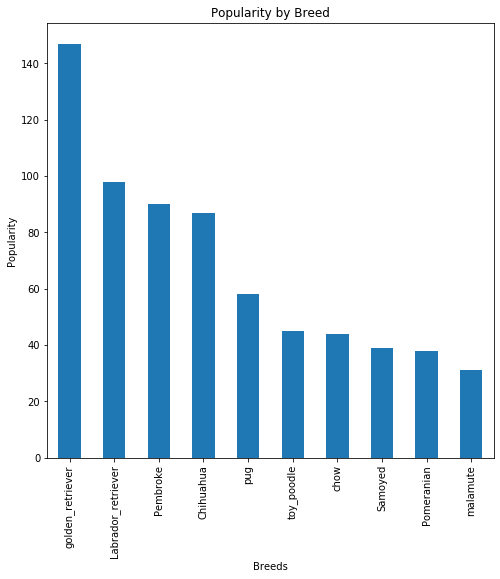

In [334]:
# get top ten value counts for predictions(breeds) and plot it
top= (df.prediction.value_counts().head(10))
g= top.plot(legend= False, title= 'Popularity by Breed', kind='bar', figsize=(8,8));
g.set_xlabel('Breeds');
g.set_ylabel('Popularity');

### Second part of the question

In [335]:
top = df.groupby('prediction').count().tweet_id
rating= df.groupby('prediction').mean().rating_numerator
top_rated = pd.concat([top,rating], axis=1)

In [336]:
# sorting by most popular breeds
top_rated.sort_values(by= 'tweet_id', ascending= False)

,tweet_id,rating_numerator
prediction,,
golden_retriever,147,11.571429
Labrador_retriever,98,11.234694
Pembroke,90,11.500000
Chihuahua,87,10.574713
pug,58,10.275862
...,...,...
Irish_wolfhound,1,11.000000
standard_schnauzer,1,12.000000
EntleBucher,1,11.000000


In [414]:
# sorting by highest rated breeds
top_rated.sort_values(by= 'rating_numerator', ascending= False).head(20)

,tweet_id,rating_numerator
prediction,,
black-and-tan_coonhound,1,14.000000
Bouvier_des_Flandres,1,13.000000
Pomeranian,38,12.605263
Saluki,4,12.500000
briard,3,12.333333
Tibetan_mastiff,4,12.250000
Border_terrier,7,12.142857
silky_terrier,1,12.000000
standard_schnauzer,1,12.000000


In [330]:
# tried to get highest rated dog and it turns out its a quality error
# change it to 11
df[df.prediction == 'clumber']
mask = df.prediction == 'clumber'
df.loc[mask, 'rating_numerator'] = 11

### Research Question 2: Depending on data collected from WeRateDogs, what is the most common dog gender to be owned as a pet?

In [354]:
# use gender_guesser apckage to guess genders based on dog names
import gender_guesser.detector as gender
d = gender.Detector()
names= list(df.name.dropna())
gender = []
for name in names:
    gender.append(d.get_gender(name))
gender = pd.Series(gender)
gender.value_counts()

unknown          541
male             526
female           211
mostly_male       49
mostly_female     28
andy              25
dtype: int64

In [415]:
# calculate ratio of male to female dogs
(526+49) / (211+28)

2.405857740585774

### Research Question 3: How did WeRateDogs account activity and interaction increased over time?

C:\Users\FARESS\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


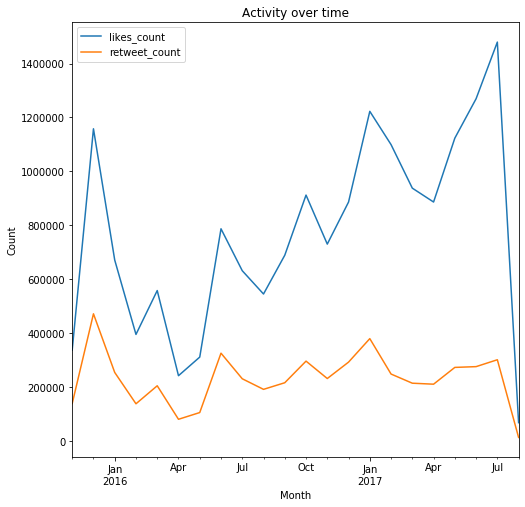

In [410]:
# make a draft df, set datetime as index and group by month of year
# plot likes and retweets counts versus time
draft = df.set_index(df.timestamp)
draft = draft.groupby(pd.Grouper(freq='M')).sum()[['likes_count', 'retweet_count']]
g1= draft.plot(legend= True, title= 'Activity over time', kind='line', figsize=(8,8));
g1.set_xlabel('Month')
g1.set_ylabel('Count');
